<a href="https://colab.research.google.com/github/ZinebKarfa/Portfolio-Management-Project---Speculative-Bubbles-in-Stock-Markets/blob/main/Speculative_Bubbles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
#this is a bubble detecting algorithm developed by Phillips and Yu (2011) and Phillips et al. (2015)
#it is based on the augmented Dickey-Fuller test

#downloading data
ticker = '^FCHI'
start = '2022-01-01'
end = '2023-01-01'
prices = yf.download(ticker, start, end)['Close']


[*********************100%***********************]  1 of 1 completed


In [ ]:
#inputting the parameters
r0 = int(len(prices)*0.1)


In [ ]:
#specify lags for the augmented Dickey-Fuller (ADF) test
adf_lags = 3


In [ ]:
#critical value of the right-tailed ADF-test (95%) from Phillips et al. (2015)
crit = 1.49


In [ ]:
#transforming data
log_prices = np.array(np.log(prices))
delta_log_prices = log_prices[1:] - log_prices[:-1]
n = len(delta_log_prices)
BSADF = np.array([])


In [ ]:
#calculating ADF stats
for r2 in range(r0,n):
    ADFS = np.array([])
    for r1 in range(0,r2-r0+1):
        X0 = log_prices[r1:r2+1]
        X = pd.DataFrame()
        X[0] = X0
        for j in range(1,adf_lags+1):
            X[j] = np.append(np.zeros(j),delta_log_prices[r1:r2+1-j])
        X = np.array(X)
        Y = delta_log_prices[r1:r2+1]
        reg = sm.OLS(Y,sm.add_constant(X))
        res = reg.fit()
        ADFS = np.append(ADFS, res.params[1]/res.bse[1])
    BSADF = np.append(BSADF, max(ADFS))


DatetimeIndex(['2022-03-04', '2022-03-07', '2022-03-08'], dtype='datetime64[ns]', name='Date', freq=None)


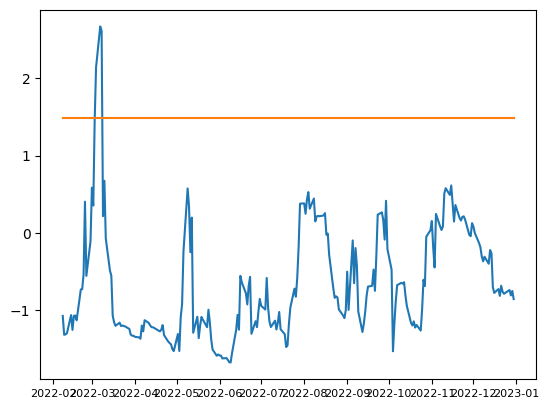

In [ ]:
#visualising the results
plt.rc('xtick',labelsize = 8)
plt.plot(prices.index[r0+1:],BSADF)
plt.plot(prices.index[r0+1:],np.ones(len(BSADF))*crit)
#printing dates when bubbles were detected
print(prices.index[r0+1:][BSADF > crit])